<a href="https://colab.research.google.com/github/sejaldua/digesting-the-digest/blob/main/BERTopic_MDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dynamic Topic Models
Dynamic topic models can be used to analyze the evolution of topics of a collection of documents over time. 

<br>

<img src="https://raw.githubusercontent.com/MaartenGr/BERTopic/master/images/logo.png" width="40%">

# Installing BERTopic

We start by installing BERTopic from PyPi:

In [ ]:
%%capture
!pip install bertopic numpy

## Restart the Notebook
After installing BERTopic, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

# **Data**
For this tutorial, we will be needing to extract all Trump's Tweet from his @realDonalTrump account. We will be removing all retweet and focus on his original tweets. 

Moreover, since we are looking at his tweets over time, we will be saving all timestamps related to his tweets.

In [ ]:
import re
import pandas as pd
from datetime import datetime

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/sejaldua/digesting-the-digest/main/article_data_via_gmail_api.csv')

# Get variables
titles = df.Title.to_list()
dates = df['Date'].apply(lambda x: pd.Timestamp(x))

In [ ]:
df

,Date,Title,Subtitle,Author,Publication,Minutes
0,2021-08-16 11:40:00+00:00,My Favorite Pandas Method Chains,Method chains I use (and reuse) because they'r...,Adam Ross Nelson,Level Up Coding,3
1,2021-08-16 11:40:00+00:00,Graph Thinking,A kind of cognitive framework called graph thi...,Paco Nathan,Knowledge Technologies,6
2,2021-08-16 11:40:00+00:00,Building and deploying end-to-end fake news cl...,In this digital era of smartphones and the int...,Eish Kumar,Towards Data Science,8
3,2021-08-16 11:40:00+00:00,Top 10 Machine Learning Algorithms You Should ...,Nowadays businesses are focusing on automation...,Nora Winkens,Artificial Intelligence in Plain English,4
4,2021-08-16 11:40:00+00:00,Scraping Tutorial on Airbnb's Website (with Sc...,Making your first steps in automating data col...,Thibaud Lamothe,Geek Culture,13
...,...,...,...,...,...,...
9211,2020-01-01 16:30:00+00:00,How to Get the Unquantifiable Benefits of Cold...,The surprising side effects that science can't...,May Pang,Better Humans,10
9212,2020-01-01 16:30:00+00:00,Screw Productivity Hacks: My Morning Routine I...,Anyone who brags about a 3:30 a.m. gym routine...,Jessica Valenti,GEN,3
9213,2020-01-01 16:30:00+00:00,The Latest Science on Chronic Pain Is Fascinat...,Experts can even predict who's likely to suffe...,Robert Roy Britt,Elemental,14
9214,2020-01-01 16:30:00+00:00,5 scientific myths you probably believe about ...,How a little knowledge can bring about some hu...,Ethan Siegel,Starts With A Bang!,8


# **Dynamic Topic Modeling**


## Basic Topic Model
To perform Dynamic Topic Modeling with BERTopic we will first need to create a basic topic model using all tweets. The temporal aspect will be ignored as we are, for now, only interested in the topics that reside in those tweets. 

In [ ]:

from bertopic import BERTopic
topic_model = BERTopic(min_topic_size=50, n_gram_range=(1,3), verbose=True)
topics, _ = topic_model.fit_transform(titles)

Batches:   0%|          | 0/288 [00:00<?, ?it/s]

2021-08-17 02:19:22,083 - BERTopic - Transformed documents to Embeddings
2021-08-17 02:19:35,759 - BERTopic - Reduced dimensionality with UMAP
2021-08-17 02:19:36,279 - BERTopic - Clustered UMAP embeddings with HDBSCAN


We can then extract most frequent topics:

In [ ]:
freq = topic_model.get_topic_info(); freq.head(10)

,Topic,Count,Name
0,-1,2897,-1_of_how_your_in
1,0,542,0_python_in python_python code_with python
2,1,478,1_data science_data scientist_data scientists_...
3,2,423,2_life_things_my_relationship
4,3,334,3_code_developer_programming_software
5,4,332,4_visualization_data visualization_python_visu...
6,5,313,5_sentiment_sentiment analysis_recommendation ...
7,6,305,6_machine learning_deep learning_in machine le...
8,7,300,7_react_with react_in react_react app
9,8,297,8_natural language_language processing_natural...


-1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [ ]:
topic_nr = freq.iloc[3]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('life', 0.013732386718435623),
 ('things', 0.013647639877610378),
 ('my', 0.012745933536359767),
 ('relationship', 0.009219503333078322),
 ('dating', 0.00904389816971254),
 ('youre', 0.008783881874910188),
 ('habits of', 0.007144280064490392),
 ('habits', 0.00683647390852386),
 ('be', 0.006628953437421481),
 ('love', 0.006228716282261951)]

We can visualize the basic topics that were created with the Intertopic Distance Map. This allows us to judge visually whether the basic topics are sufficient before proceeding to creating the topics over time. 

In [ ]:
fig = topic_model.visualize_topics(); fig

## Topics over Time
Before we start with the Dynamic Topic Modeling step, it is important that you are satisfied with the topics that were created previously. We are going to be using those specific topics as a base for Dynamic Topic Modeling. 

Thus, this step will essentially show you how the topics that were defined previously have evolved over time. 

There are a few important parameters that you should take note of, namely:

* `docs`
  * These are the tweets that we are using
* `topics`
  * The topics that we have created before
* `timestamps`
  * The timestamp of each tweet/document
* `global_tuning`
  * Whether to average the topic representation of a topic at time *t* with its global topic representation
* `evolution_tuning`
  * Whether to average the topic representation of a topic at time *t* with the topic representation of that topic at time *t-1*
* `nr_bins`
  * The number of bins to put our timestamps into. It is computationally inefficient to extract the topics at thousands of different timestamps. Therefore, it is advised to keep this value below 20. 


In [ ]:
topics_over_time = topic_model.topics_over_time(docs=titles, 
                                                topics=topics, 
                                                timestamps=dates, 
                                                global_tuning=True, 
                                                evolution_tuning=True, 
                                                nr_bins=30)

30it [00:39,  1.30s/it]


## Visualize Topics over Time
After having created our `topics_over_time`, we will have to visualize those topics as accessing them becomes a bit more difficult with the added temporal dimension. 

To do so, we are going to visualize the distribution of topics over time based on their frequency. Doing so allows us to see how the topics have evolved over time. Make sure to hover over any point to see how the topic representation at time *t* differs from the global topic representation. 


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_barchart(top_n_topics=9, n_words=5, height=800)

In [ ]:
topic_model.get_representative_docs(topic_model.find_topics('recommender system')[0][0])

['Exploring Spotify Data with Pandas ',
 'Implementing Naive Bayes for Sentiment Analysis in Python ',
 'Building a Content Based Book Recommendation Engine ']

In [ ]:
topic_model._sort_mappings_by_frequency

<bound method BERTopic._sort_mappings_by_frequency of <bertopic._bertopic.BERTopic object at 0x7fc4f3431490>>

In [ ]:
topic_model.get_params()

{'calculate_probabilities': False,
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x7fc642b360d0>,
 'hdbscan_model': HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
         approx_min_span_tree=True, cluster_selection_epsilon=0.0,
         cluster_selection_method='eom', core_dist_n_jobs=4,
         gen_min_span_tree=False, leaf_size=40,
         match_reference_implementation=False, memory=Memory(location=None),
         metric='euclidean', min_cluster_size=50, min_samples=None, p=None,
         prediction_data=True),
 'language': 'english',
 'low_memory': False,
 'min_topic_size': 50,
 'n_gram_range': (1, 3),
 'nr_topics': None,
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': UMAP(a=None, angular_rp_forest=True, b=None, dens_frac=0.0, dens_lambda=0.0,
      dens_var_shift=0.1, densmap=False, disconnection_distance=None,
      force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
      local_c

In [ ]:
df['Topic'] = df['Title'].apply(lambda x: topic_model.find_topics(x)[0][0])
df.head()

,Date,Title,Subtitle,Author,Publication,Minutes,Topic
0,2021-08-16 11:40:00+00:00,My Favorite Pandas Method Chains,Method chains I use (and reuse) because they'r...,Adam Ross Nelson,Level Up Coding,3,12
1,2021-08-16 11:40:00+00:00,Graph Thinking,A kind of cognitive framework called graph thi...,Paco Nathan,Knowledge Technologies,6,4
2,2021-08-16 11:40:00+00:00,Building and deploying end-to-end fake news cl...,In this digital era of smartphones and the int...,Eish Kumar,Towards Data Science,8,3
3,2021-08-16 11:40:00+00:00,Top 10 Machine Learning Algorithms You Should ...,Nowadays businesses are focusing on automation...,Nora Winkens,Artificial Intelligence in Plain English,4,6
4,2021-08-16 11:40:00+00:00,Scraping Tutorial on Airbnb's Website (with Sc...,Making your first steps in automating data col...,Thibaud Lamothe,Geek Culture,13,14


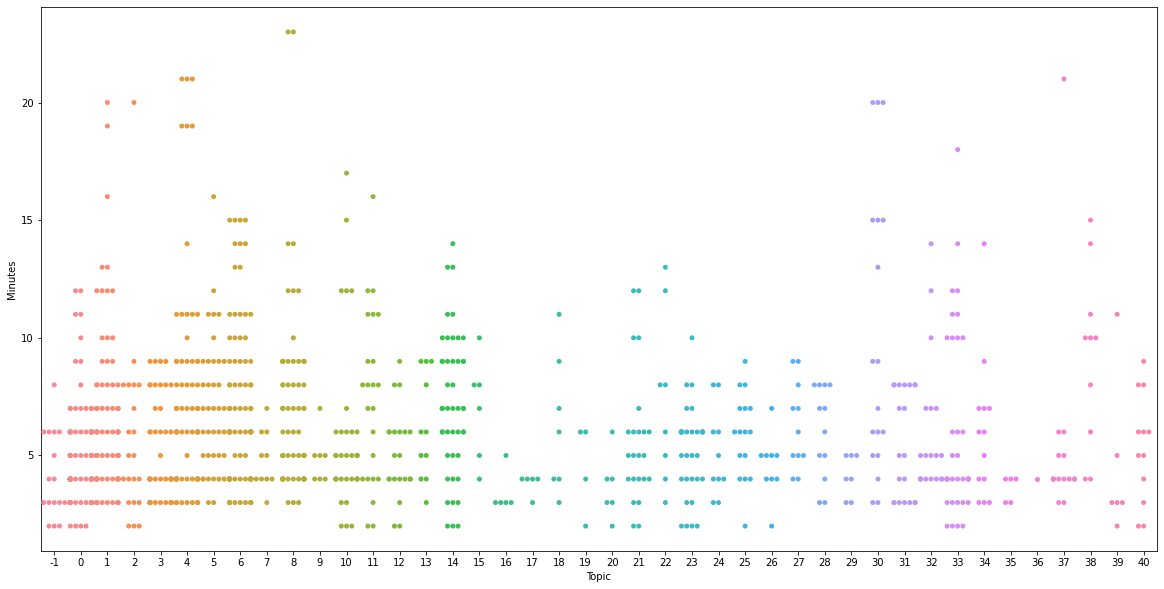

In [ ]:
mini_df = df.iloc[:1000]
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = sns.swarmplot(data=mini_df, x='Topic', y='Minutes');

In [ ]:
df[df['Topic'] == 30]

,Date,Title,Subtitle,Author,Publication,Minutes,Topic
32,2021-08-13 11:40:00+00:00,Using The Cosine Similarity and DBSCAN to Get ...,How many clusters are in my data set? And what...,Hwa-Wei Wu,"Web Mining [IS688, Spring 2021]",13,30
55,2021-08-11 11:40:00+00:00,How to Calculate Molecular Similarity,Day 15 of the 66 Days of Data,Chanin Nantasenamat,Data Professor,5,30
91,2021-08-08 11:40:00+00:00,Audio signal feature extraction and clustering,Machine learning has been trending for almost ...,Aakash Mallik,Project Heuristics,15,30
210,2021-07-29 11:40:00+00:00,How to Calculate Molecular Similarity,Day 15 of the 66 Days of Data,Chanin Nantasenamat,Data Professor,5,30
268,2021-07-24 11:40:00+00:00,Audio signal feature extraction and clustering,Machine learning has been trending for almost ...,Aakash Mallik,Project Heuristics,15,30
...,...,...,...,...,...,...,...
7053,2020-05-11 15:50:00+00:00,Tech Union Leaders Are Dodging Surveillance on...,"For worker movements, digital tools are a doub...",Sarah Emerson,OneZero,8,30
7448,2020-04-16 15:50:00+00:00,K-means Clustering Python Example,K-Means Clustering is an unsupervised machine ...,Cory Maklin,Towards Data Science,4,30
7761,2020-03-28 15:50:00+00:00,K-means Clustering Python Example,K-Means Clustering is an unsupervised machine ...,Cory Maklin,Towards Data Science,4,30
8872,2020-01-23 13:40:00+00:00,Fragment Transitions,Getting them working,Chris Banes,Android Developers,4,30
